# Set the position of 39 special-handling source as the arc or global parameter?

S$\acute{e}$bastien told me that if keep positions of all radio sources as the global parameters,
that is, no more special-handling sources (39 sources), the estimated source positions are closer to 
*Gaia* position.

In this notebook I will check this conclusion. 
Two solutions were made for comparison.
One solution, named `icrf3-39arcsou`, treated the postions of 30 so-called special-handling sources as 
the arc parameters as in the age of ICRF2.
The other one, labelled as `icrf3-noarcsou`, set positions for all sources as the global parameters.
Other configuration of these two solutions were kept the same.

I will compare the source positions from two solutions and also compare them with the *Gaia* DR2 position.
Besides, I will also compare the EOP and TRF products.


## 1 Radio source position


In [19]:
from astropy.table import Table, Column
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline
import numpy as np

import bottleneck as bn

In [2]:
from my_progs.vlbi.read_sou import read_sou

solglb = read_sou("../data/icrf3-noarcsou/icrf3-noarcsou.sou")
solarc = read_sou("../data/icrf3-ga-19/icrf3-ga-19.sou")

In [3]:
from my_progs.catalog.pos_diff import radio_cat_diff_calc

soldif = radio_cat_diff_calc(solglb, solarc, sou_name="iers_name")

A direct comparison of radio source positions from two solutions shows some RA-dependent pattern.

The positional offset is smaller that 10 $\mu$as.

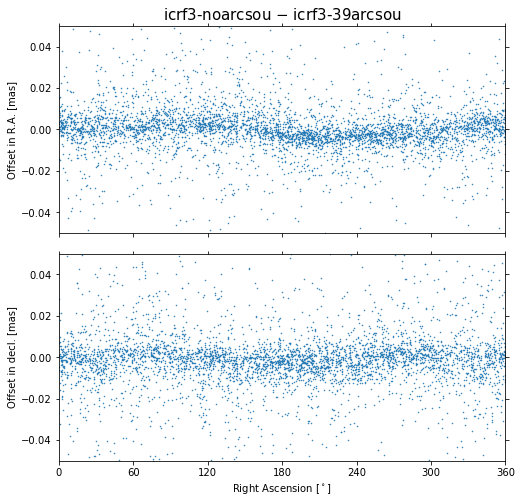

In [4]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(soldif["ra"], soldif["dra"], ".", ms=1)
ax1.plot(soldif["ra"], soldif["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Right Ascension [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(0, 361, 60))

ax0.set_xlim([0, 360])
ax0.set_ylim([-0.05, 0.05])
ax1.set_ylim([-0.05, 0.05])

ax0.set_title("icrf3-noarcsou $-$ icrf3-39arcsou", fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.1)

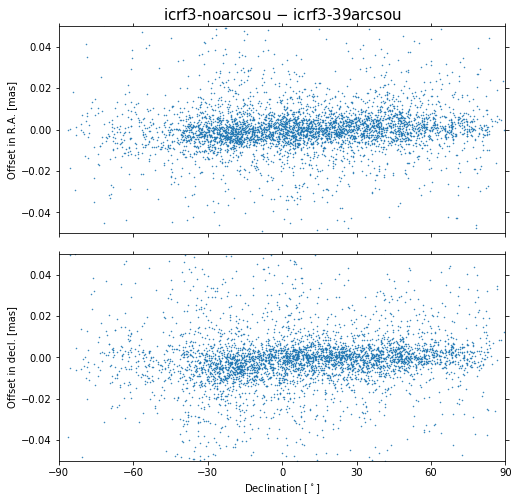

In [5]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(soldif["dec"], soldif["dra"], ".", ms=1)
ax1.plot(soldif["dec"], soldif["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Declination [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(-90, 91, 30))

ax0.set_xlim([-90, 90])
ax0.set_ylim([-0.05, 0.05])
ax1.set_ylim([-0.05, 0.05])

ax0.set_title("icrf3-noarcsou $-$ icrf3-39arcsou", fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.1)

The positional offsets of these two solutions with respect to the *Gaia* DR2 positions show very little difference.

So do the vsh parameters estimated from positional offsets, even though for the glide terms 
the `icrf3-noarcsou` solution shows smaller estimates,
especially $D_z$.

In [6]:
from my_progs.catalog.read_gaia import read_dr2_iers

gdr2 = read_dr2_iers()

# Crossmatch between Gaia DR2 and solution
gaiadif1 = radio_cat_diff_calc(solglb, gdr2, sou_name="iers_name")

gaiadif2 = radio_cat_diff_calc(solarc, gdr2, sou_name="iers_name")

/usr/local/miniconda3/lib/python3.7/site-packages/bottleneck/slow/move.py:149: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  nidx1 = n[idx1]
/usr/local/miniconda3/lib/python3.7/site-packages/bottleneck/slow/move.py:150: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  nidx1 = nidx1 - n[idx2]
/usr/local/miniconda3/lib/python3.7/site-packages/bottleneck/slow/move.py:152: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as a

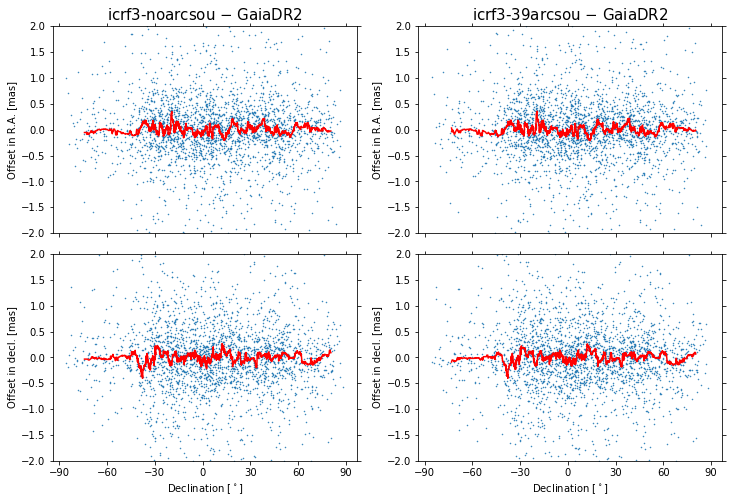

In [7]:
fig, ((ax0, ax2), (ax1, ax3)) = plt.subplots(figsize=(12, 8),
                                             nrows=2, ncols=2,
                                             sharex=True)

ax0.plot(gaiadif1["dec"], gaiadif1["dra"], ".", ms=1)
ax1.plot(gaiadif1["dec"], gaiadif1["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Declination [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

# Running median
temp1 = Table(gaiadif1)
temp1.sort("dec")

window = 50
decmd1 = bn.move_median(temp1["dec"], window=window)
dramd1 = bn.move_median(temp1["dra"], window=window)
ddecmd1 = bn.move_median(temp1["ddec"], window=window)

ax0.plot(decmd1, dramd1, "r")
ax1.plot(decmd1, ddecmd1, "r")

ax1.set_xticks(np.arange(-90, 91, 30))

ax0.set_ylim([-2, 2])
ax1.set_ylim([-2, 2])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax0.set_title("icrf3-noarcsou $-$ GaiaDR2", fontsize=15)

ax2.plot(gaiadif2["dec"], gaiadif2["dra"], ".", ms=1)
ax3.plot(gaiadif2["dec"], gaiadif2["ddec"], ".", ms=1)

ax2.set_ylabel("Offset in R.A. [mas]")

ax3.set_xlabel("Declination [$^\circ$]")
ax3.set_ylabel("Offset in decl. [mas]")

# Running median
temp2 = Table(gaiadif2)
temp2.sort("dec")

window = 50
decmd2 = bn.move_median(temp2["dec"], window=window)
dramd2 = bn.move_median(temp2["dra"], window=window)
ddecmd2 = bn.move_median(temp2["ddec"], window=window)

ax2.plot(decmd2, dramd2, "r")
ax3.plot(decmd2, ddecmd2, "r")

ax3.set_xticks(np.arange(-90, 91, 30))

ax2.set_ylim([-2, 2])
ax3.set_ylim([-2, 2])

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")
ax3.xaxis.set_ticks_position("both")
ax3.yaxis.set_ticks_position("both")

ax2.set_title("icrf3-39arcsou $-$ GaiaDR2", fontsize=15)

plt.subplots_adjust(hspace=0.1)

In [14]:
# My modules
from my_progs.catalog.vsh_deg2_cor import vsh_deg02_fitting, residual_calc02
from my_progs.catalog.write_output import print_vsh1_corr, print_vsh2_corr

# icrf2-nga-09 - gaia dr2
# Transform columns into np.array
dra1 = np.array(gaiadif1["dra"])
ddec1 = np.array(gaiadif1["ddec"])
dra_err1 = np.array(gaiadif1["dra_err"])
ddec_err1 = np.array(gaiadif1["ddec_err"])
ra_rad1 = np.array(gaiadif1["ra"].to(u.radian))
dec_rad1 = np.array(gaiadif1["dec"].to(u.radian))
dra_ddec_cov1 = np.array(gaiadif1["dra_ddec_cov"])

# Transformation parameters
# l_max = 2
wg21, sigg21, _, _, _, _ = vsh_deg02_fitting(
    dra1, ddec1, ra_rad1, dec_rad1, dra_err1, ddec_err1,
    cov=dra_ddec_cov1, elim_flag="None")

# mas -> uas
wg21 = wg21 * 1.e3
sigg21 = sigg21 * 1.e3

# icrf2-ga-09 - gaia dr2
# Transform columns into np.array
dra2 = np.array(gaiadif2["dra"])
ddec2 = np.array(gaiadif2["ddec"])
dra_err2 = np.array(gaiadif2["dra_err"])
ddec_err2 = np.array(gaiadif2["ddec_err"])
ra_rad2 = np.array(gaiadif2["ra"].to(u.radian))
dec_rad2 = np.array(gaiadif2["dec"].to(u.radian))
dra_ddec_cov2 = np.array(gaiadif2["dra_ddec_cov"])

# Transformation parameters
# l_max = 2
wg22, sigg22, _, _, _, _ = vsh_deg02_fitting(
    dra2, ddec2, ra_rad2, dec_rad2, dra_err2, ddec_err2,
    cov=dra_ddec_cov2, elim_flag="None")

# mas -> uas
wg22 = wg22 * 1.e3
sigg22 = sigg22 * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "                 Rotation [uas]                  "
      "                 Glide [uas]               \n"
      "                   x             y             z"
      "                   x             y             z\n"
      "                   x             y             z"
      "                   x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "noarcsou-GDR2 %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "arcsou -GDR2  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra2.size,
       wg21[3], sigg21[3], wg21[4], sigg21[4], wg21[5], sigg21[5],
       wg21[0], sigg21[0], wg21[1], sigg21[1], wg21[2], sigg21[2],
       wg22[3], sigg22[3], wg22[4], sigg22[4], wg22[5], sigg22[5],
       wg22[0], sigg22[0], wg22[1], sigg22[1], wg22[2], sigg22[2]))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])

print("icrf3noarcsou - Gaia DR2")
t_quadg1 = Table([quad_names, wg21[6:], sigg21[6:]],
                 names=["Quadrupolar term", "Estimate", "Error"])
t_quadg1["Estimate"].format = "%5.0f"
t_quadg1["Error"].format = "%5.0f"
print(t_quadg1)

print("icrf3arcsou - Gaia DR2")
t_quadg2 = Table([quad_names, wg22[6:], sigg22[6:]],
                 names=["Quadrupolar term", "Estimate", "Error"])
t_quadg2["Estimate"].format = "%5.0f"
t_quadg2["Error"].format = "%5.0f"
print(t_quadg2)

Estimates (  2766 sources)
--------------------------------------------------------------------------------------------
                 Rotation [uas]                                   Glide [uas]               
                   x             y             z                   x             y             z
                   x             y             z                   x             y             z
--------------------------------------------------------------------------------------------
noarcsou-GDR2  +63 +/-  29  -124 +/-  27   -41 +/-  27            -8 +/-  28   +58 +/-  27    -3 +/-  28
arcsou -GDR2   +63 +/-  30   -99 +/-  28    -4 +/-  28           -18 +/-  29   +46 +/-  28   +33 +/-  29
--------------------------------------------------------------------------------------------

icrf3noarcsou - Gaia DR2
Quadrupolar term Estimate Error
---------------- -------- -----
            ER22       24    17
            EI22        0    17
            ER21       34    31
           

In [9]:
from my_progs.catalog.vec_mod import vec_mod_calc

# icrf2-nga-09 - gaia dr2
gli1 = wg21[:3]
rot1 = wg21[3:6]
qua1 = wg21[6:]

gerr1 = sigg21[:3]
rerr1 = sigg21[3:6]
qerr1 = sigg21[6:]

glimod1, glierr1 = vec_mod_calc(gli1, gerr1)
rotmod1, roterr1 = vec_mod_calc(rot1, rerr1)

# icrf2-ga-09 - gaia dr2
gli2 = wg22[:3]
rot2 = wg22[3:6]
qua2 = wg22[6:]

gerr2 = sigg22[:3]
rerr2 = sigg22[3:6]
qerr2 = sigg22[6:]

glimod2, glierr2 = vec_mod_calc(gli2, gerr2)
rotmod2, roterr2 = vec_mod_calc(rot2, rerr2)

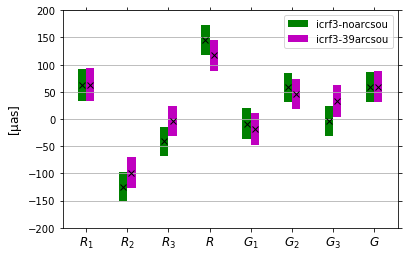

In [10]:
# Rotation
fig, ax = plt.subplots()

barwidth = 0.2
loc = 0.1

terms = ["$R_1$", "$R_2$", "$R_3$", "$R$",
         "$G_1$", "$G_2$", "$G_3$", "$G$"]

pos1 = np.arange(len(terms)) - 1 * loc
pos2 = np.arange(len(terms)) + 1 * loc

par1 = np.concatenate((rot1, [rotmod1], gli1, [glimod1]))
err1 = np.concatenate((rerr1, [roterr1], gerr1, [glierr1]))

par2 = np.concatenate((rot2, [rotmod2], gli2, [glimod2]))
err2 = np.concatenate((rerr2, [roterr2], gerr2, [glierr2]))


ax.bar(pos1, 2 * err1, bottom=par1-err1, width=barwidth,
       color="g", ecolor="black", label="icrf3-noarcsou")
ax.bar(pos2, 2 * err2, bottom=par2-err2, width=barwidth,
       color="m", ecolor="black", label="icrf3-39arcsou")

ax.plot(pos1, par1, "kx")
ax.plot(pos2, par2, "kx")

ax.set_xticks(range(len(terms)))
ax.set_xticklabels(terms, fontsize=12)
ax.set_ylabel("[$\\mathrm{\mu as}$]", fontsize=12)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.yaxis.grid()  # horizontal lines

ax.set_ylim(-200, 200)

ax.legend()

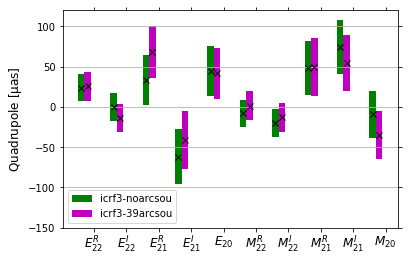

In [11]:
# Quadruple terms

fig, ax = plt.subplots()

barwidth = 0.2
loc = 0.2

terms = ["$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
         "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$", ]

pos1 = np.arange(len(terms)) - 2 * loc
pos2 = np.arange(len(terms)) - 1 * loc

ax.bar(pos1, 2 * qerr1, bottom=qua1-qerr1, width=barwidth,
       color="g", ecolor="black", label="icrf3-noarcsou")
ax.bar(pos2, 2 * qerr2, bottom=qua2-qerr2, width=barwidth,
       color="m", ecolor="black", label="icrf3-39arcsou")

ax.plot(pos1, qua1, "kx")
ax.plot(pos2, qua2, "kx")

ax.set_xticks(range(len(terms)))
ax.set_xticklabels(terms, fontsize=12)

ax.set_ylabel("Quadrupole [$\\mathrm{\mu as}$]", fontsize=12)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.yaxis.grid()  # horizontal lines

ax.set_ylim(-150, 120)

ax.legend()

## 2 EOP comparison

We find very clear linear trend in the offset series of polar motions. especially after 2010,
while in the same data span the CPO series are less influenced by the different configurations.

This result is similar ot that of assessing the implication of switching ICRF.
It tells us that the post-2010 data are very stable and insensitive to the changes in the CRF
configuration.


In [16]:
from my_progs.vlbi.read_eop import read_eob
from my_progs.vlbi.comp_eop import calc_eop_offset

# icrf3-noarcsou
eobglb = read_eob("../data/icrf3-noarcsou/icrf3-noarcsou.eob") 

# icrf3-39arcsou
eobarc = read_eob("../data/icrf3-ga-19/icrf3-ga-19.eob")


eoboft = calc_eop_offset(eobglb, eobarc, "../logs/icrf3-noarcsou-39arcsou_eob_offset.dat")

There are 6585 and 6585 points in series 1 and series 2, respectively,between which 6585 are common.
Save the EOP offset series in ../logs/icrf3-noarcsou-39arcsou_eob_offset.dat


In [17]:
from astropy.time import Time

# Create a Time object for epochs of EOP
eoboft.sort("epoch_pmr")

# which is convenient to convert unit from mjd to jyear
pmrEpoch = Time(eoboft["epoch_pmr"], format="mjd")

nutEpoch = Time(eoboft["epoch_nut"], format="mjd")

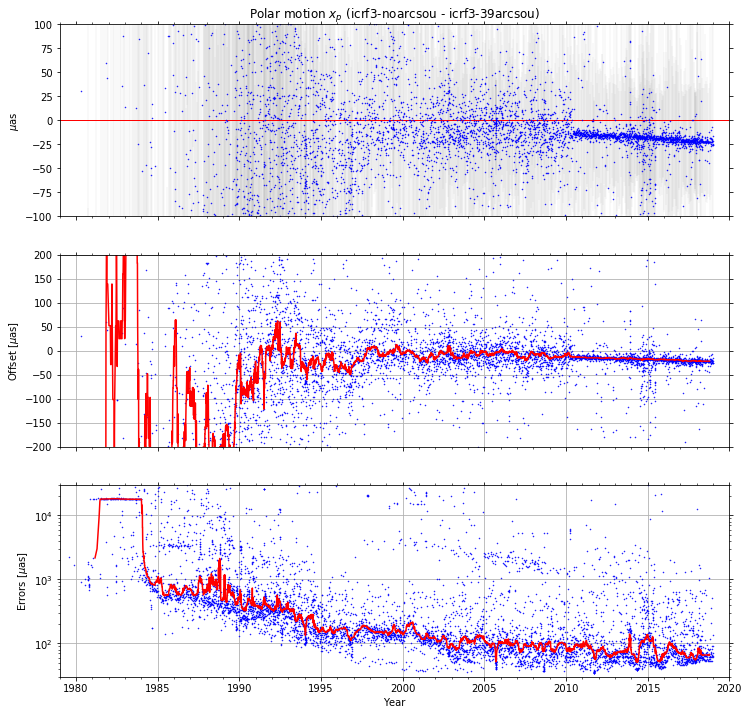

In [24]:
# Polar motion xp
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear,
            eoboft["dxp"],
            yerr = eoboft["dxp_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(pmrEpoch.jyear, eoboft["dxp"], "b.", ms = 1)
epomed = bn.move_median(pmrEpoch.jyear, window=50)
dxpmed = bn.move_median(eoboft["dxp"], window=50)
ax1.plot(epomed, dxpmed, "r")


# Formal error
ax2.plot(pmrEpoch.jyear, eoboft["dxp_err"], "b.", ms = 1)
dxperrmed = bn.move_median(eoboft["dxp_err"], window=50)
ax2.plot(epomed, dxperrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)
# ax1.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -100, 100])
ax1.set_ylim([-200, 200])
ax2.set_ylim([30, 30000])

# Titles and Labels
ax0.set_title("Polar motion $x_p$ (icrf3-noarcsou - icrf3-39arcsou)")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(5))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

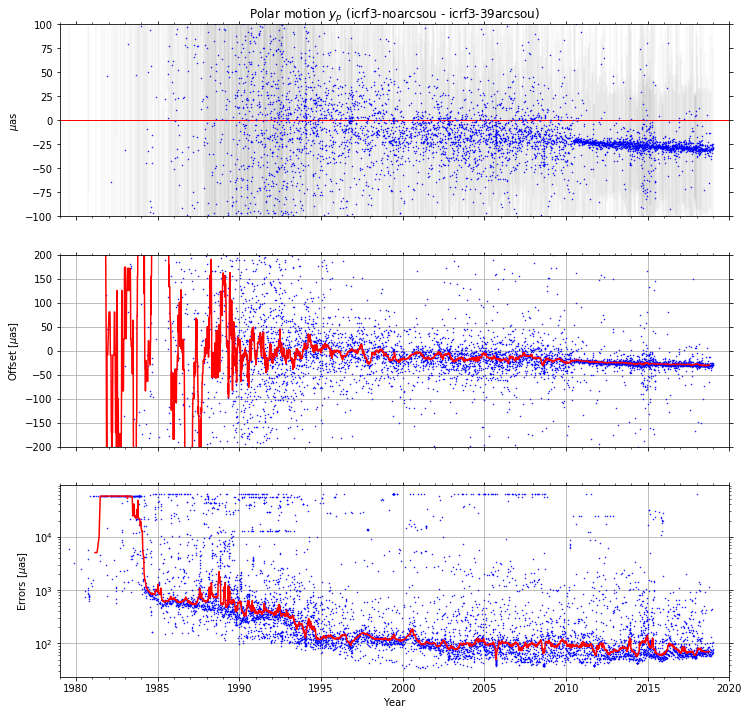

In [27]:
# Polar motion yp
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear,
            eoboft["dyp"],
            yerr = eoboft["dyp_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(pmrEpoch.jyear, eoboft["dyp"], "b.", ms = 1)
epomed = bn.move_median(pmrEpoch.jyear, window=50)
dypmed = bn.move_median(eoboft["dyp"], window=50)
ax1.plot(epomed, dypmed, "r")


# Formal error
ax2.plot(pmrEpoch.jyear, eoboft["dyp_err"], "b.", ms = 1)
dyperrmed = bn.move_median(eoboft["dyp_err"], window=50)
ax2.plot(epomed, dyperrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -100, 100])
ax1.set_ylim([-200, 200])
# ax2.set_ylim([30, 40000])

# Titles and Labels
ax0.set_title("Polar motion $y_p$ (icrf3-noarcsou - icrf3-39arcsou)")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(5))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

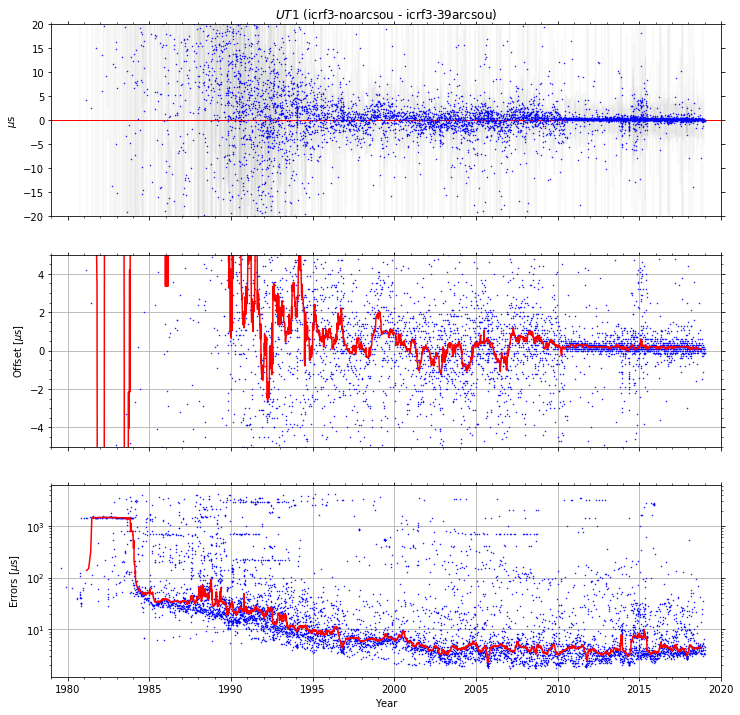

In [28]:
# UT1
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear,
            eoboft["dut"],
            yerr = eoboft["dut_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(pmrEpoch.jyear, eoboft["dut"], "b.", ms = 1)
epomed = bn.move_median(pmrEpoch.jyear, window=50)
dutmed = bn.move_median(eoboft["dut"], window=50)
ax1.plot(epomed, dutmed, "r")


# Formal error
ax2.plot(pmrEpoch.jyear, eoboft["dut_err"], "b.", ms = 1)
duterrmed = bn.move_median(eoboft["dut_err"], window=50)
ax2.plot(epomed, duterrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -20, 20])
ax1.set_ylim([-5, 5])
# ax2.set_ylim([30, 40000])

# Titles and Labels
ax0.set_title("$UT1$ (icrf3-noarcsou - icrf3-39arcsou)")
ax0.set_ylabel("$\mu$s")
ax1.set_ylabel("Offset [$\mu$s]")
ax2.set_ylabel("Errors [$\mu$s]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

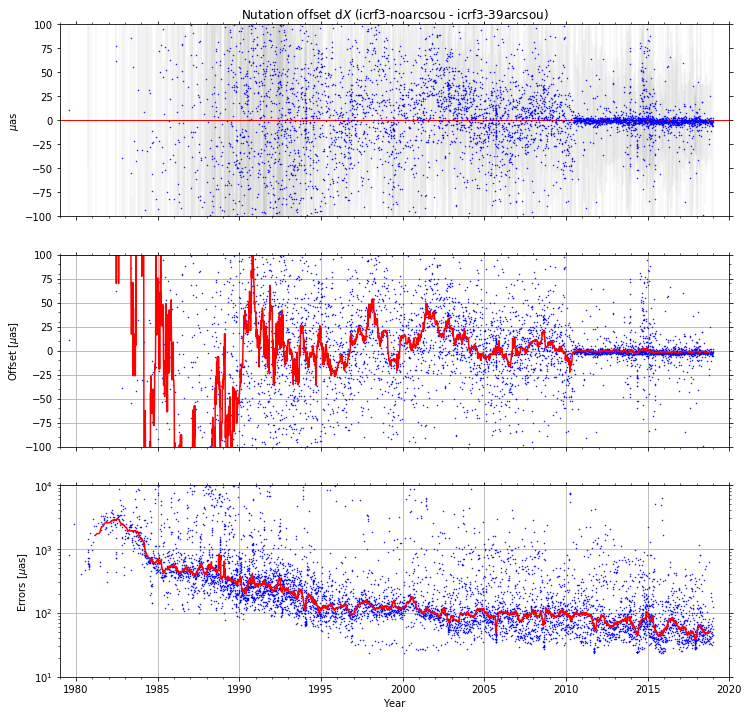

In [32]:
# Nutation offset dX
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(nutEpoch.jyear,
            eoboft["ddX"],
            yerr = eoboft["ddX_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(nutEpoch.jyear, eoboft["ddX"], "b.", ms = 1)
epomed = bn.move_median(nutEpoch.jyear, window=50)
dutmed = bn.move_median(eoboft["ddX"], window=50)
ax1.plot(epomed, dutmed, "r")


# Formal error
ax2.plot(nutEpoch.jyear, eoboft["ddX_err"], "b.", ms = 1)
duterrmed = bn.move_median(eoboft["ddX_err"], window=50)
ax2.plot(epomed, duterrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -100, 100])
ax1.set_ylim([-100, 100])
ax2.set_ylim([10, 10000])

# Titles and Labels
ax0.set_title("Nutation offset d$X$ (icrf3-noarcsou - icrf3-39arcsou)")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(10))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

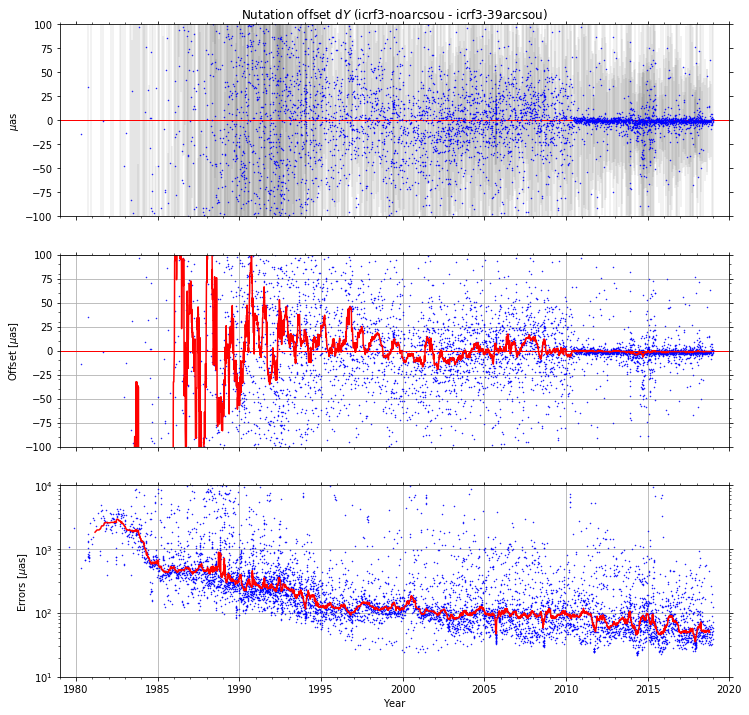

In [31]:
# Nutation offset dY
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(nutEpoch.jyear,
            eoboft["ddY"],
            yerr = eoboft["ddY_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.1,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(nutEpoch.jyear, eoboft["ddY"], "b.", ms = 1)
epomed = bn.move_median(nutEpoch.jyear, window=50)
dutmed = bn.move_median(eoboft["ddY"], window=50)
ax1.plot(epomed, dutmed, "r")


# Formal error
ax2.plot(nutEpoch.jyear, eoboft["ddY_err"], "b.", ms = 1)
duterrmed = bn.move_median(eoboft["ddY_err"], window=50)
ax2.plot(epomed, duterrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)
ax1.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -100, 100])
ax1.set_ylim([-100, 100])
ax2.set_ylim([10, 10000])

# Titles and Labels
ax0.set_title("Nutation offset d$Y$ (icrf3-noarcsou - icrf3-39arcsou)")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(10))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()